# Demonstration de la politique de relaxation
## Reproduction des résultats du rapport

Ce notebook a pour objectif de rassembler les différents résultats du rapport à des fins de reproductibilité des résultats. Nous utilisons la librarie `joblib` pour enregistrer les résultats des simulations. Dans un premier temps il faut donc refaire les simulations (environ $20$ minutes pour l'étude du problème $12$, $20$ minutes pour l'aggrégation de $20$ problèmes ($\tau=time\_horizon$) et $90$ minutes pour l'aggrégation de $10$ problèmes ($\tau=time\_horizon$ et $\tau = 1$) sur Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz
). Le cache, initialement vide, se trouve dans le dossier `cachedir`. 

Nous avons enregistré une série de problèmes (= ensemble $\{\alpha, P_0, P_1, R_0, R_1\}$) générés aléatoirement  dans `problems.npz`, que nous chargeons pour les simulations.
Nous utilisons ici $3$ états et $R_0 = [0, 0, 0]$.


In [1]:
import numpy as np
from Problem import Problem
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## Comparaison de la relaxation aux index de Whittle

### Exemple 12
### Un probleme où la relaxation est plus performante que Whittle

In [2]:
b = np.load("problems.npz",allow_pickle = True)['arr_0']
P0,P1,R1,aaa = b[12]
R0 = [0 for _ in range(3)]

Text(0, 0.5, 'Reward per bandit per unit time')

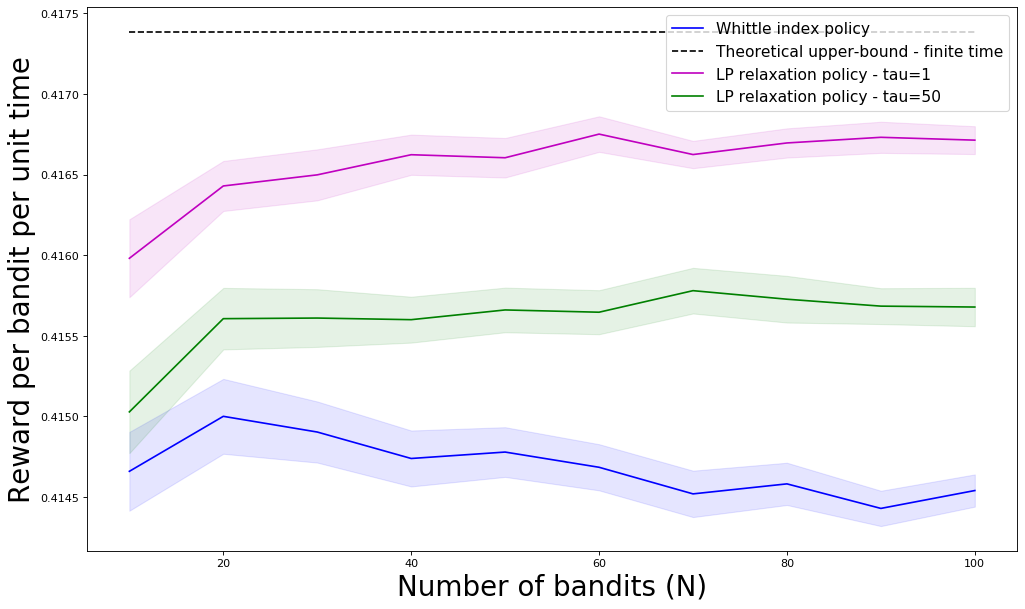

In [3]:
%matplotlib inline
p = Problem(3, 50, 0.6, 50, PR=[P0, P1, R0, R1], tau=1, time_exp=50, repeat_times = 100)

# plot for two values of tau
plt.figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
plt.rc('legend',fontsize=14)
l = np.linspace(p.number_bandits_list[0], p.number_bandits_list[-1], 100)

# plot whittle
w = p.whittle_simulation()

plt.plot(p.number_bandits_list, w[0], 'b',label = 'Whittle index policy')
plt.fill_between(p.number_bandits_list, w[0]-w[1], w[0]+w[1], alpha=0.1, color='b')

# upper bound
total_values_tau1, r_ubound = p.simulation_n_variable()
plt.plot(l,[r_ubound]*100,'k--',label = 'Theoretical upper-bound - finite time')

# tau 1
plt.plot(p.number_bandits_list, total_values_tau1[0], 'm',label = 'LP relaxation policy - tau=1')
plt.fill_between(p.number_bandits_list, total_values_tau1[0]-total_values_tau1[1], 
                total_values_tau1[0]+total_values_tau1[1], alpha=0.1, color='m')

# tau 50
p.tau = p.time_horizon
total_values_tau50, r_ubound = p.simulation_n_variable()
plt.plot(p.number_bandits_list, total_values_tau50[0], 'g',label = 'LP relaxation policy - tau='+str(p.tau))
plt.fill_between(p.number_bandits_list, total_values_tau50[0]-total_values_tau50[1], 
                total_values_tau50[0]+total_values_tau50[1], alpha=0.1, color='g')

# legends        
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.xlabel('Number of bandits (N)',fontsize = 25)
plt.ylabel('Reward per bandit per unit time',fontsize = 25)


### Impact du choix de $T_H$ sur la performance

In [4]:
p = Problem(3, 50, 0.6, 100, PR=[P0, P1, R0, R1], tau=10, time_exp=1000, repeat_times = 100)

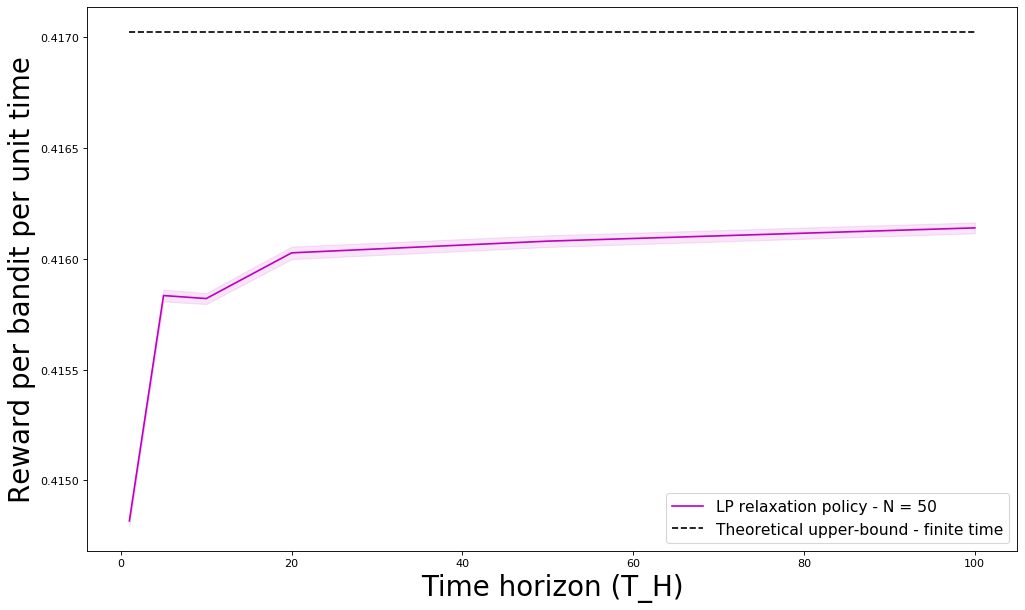

In [5]:
p.plot_sim_timehorizon(name='../bandits_irl/latex/p12_relax_vs_time.png')

### Impact du choix de $\tau$ sur les performances et evolution de la politique au cours du temps

In [6]:
p = Problem(3, 50, 0.6, 100, PR=[P0, P1, R0, R1], tau=1, time_exp=100, repeat_times = 100)

In [7]:
p.plot_policy_evolution(name='../bandits_irl/latex/p12_relax_policy.png')

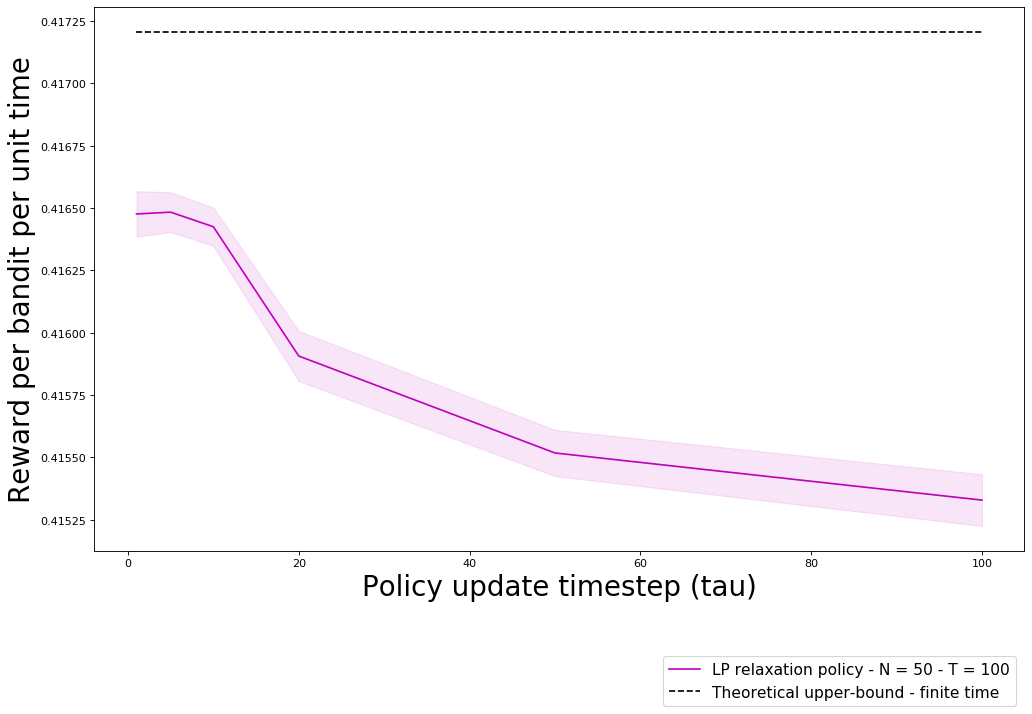

In [8]:
p.plot_sim_tau(name='../bandits_irl/latex/p12_relax_vs_tau.png')

## Aggrégation des performances de plusieurs problèmes

In [9]:
nb_state = 3
init_nb_bandit = 50
repeat_times = 50
number_bandits_list = list(range(10, 110, 10))
pairs = [(0, 0.3),
(1, 0.4),
(2, 0.4),
(3, 0.7),
(4, 0.5),
(5, 0.5),
(6, 0.5),
(7, 0.6),
(8, 0.3),
(9, 0.4),
(10, 0.6),
(11, 0.6),
(12, 0.4),
(13, 0.3),
(14, 0.4),
(15, 0.6),
(16, 0.7),
(17, 0.6),
(18, 0.5),
(20, 0.2)]
l = np.linspace(number_bandits_list[0], number_bandits_list[-1], 100)

a = np.load("problems.npz",allow_pickle = True)
b = a['arr_0']
R0 = [0 for _ in range(nb_state)]


* $T_H = \tau = T = 100$

In [10]:
time_horizon = 100
tau = 100
time_exp = 100

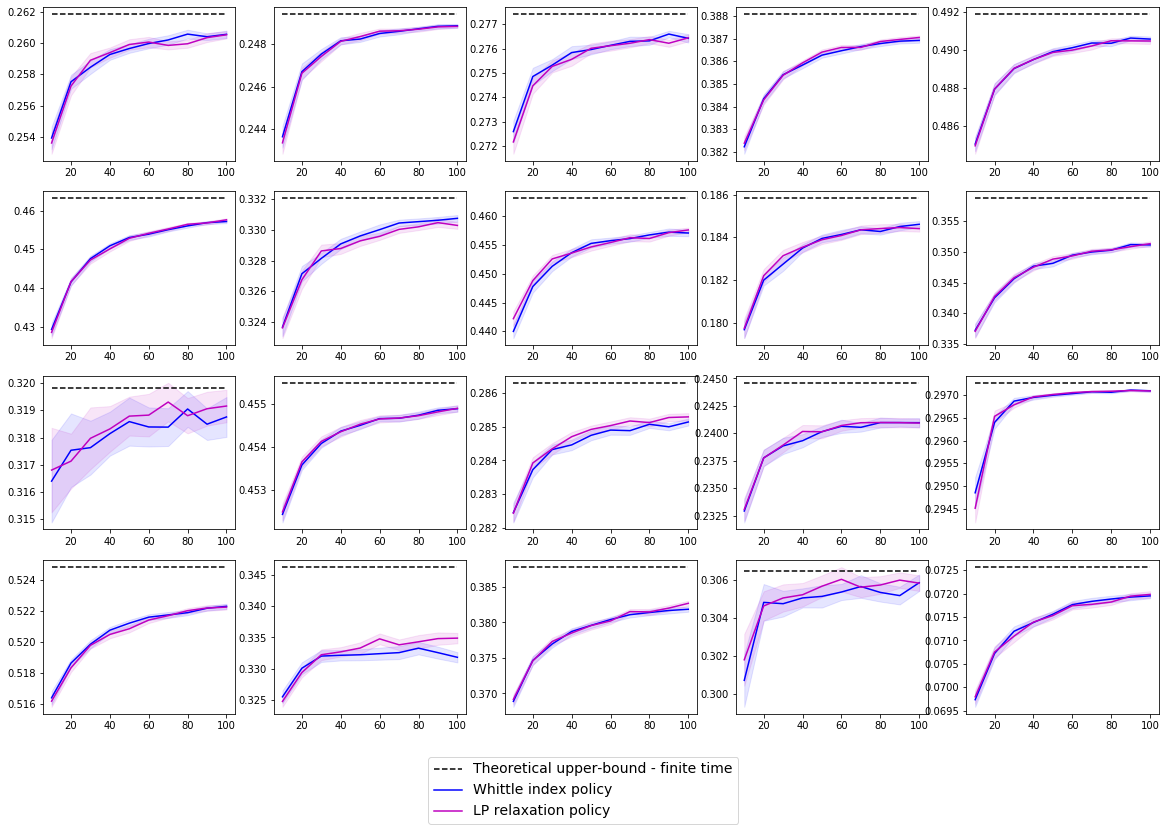

In [11]:
fig, axes = plt.subplots(nrows=4,ncols=5, figsize=(20, 13), facecolor='w', edgecolor='k')

cpt = 0

for i, row in enumerate(axes):
    for j, ax in  enumerate(row):
        pb, alpha = pairs[cpt]
        P0,P1,R1,_ = b[pb]
        p = Problem(nb_state, 50, alpha, time_horizon, PR=[P0, P1, R0, R1], tau=tau, time_exp=time_exp, repeat_times=repeat_times,
                   number_bandits_list=number_bandits_list)

        total_values, r_ubound = p.simulation_n_variable()
        w = p.whittle_simulation()
        ax.plot(l,[r_ubound]*100,'k--',label = 'Theoretical upper-bound - finite time')

        ax.plot(number_bandits_list, w[0], 'b',label = 'Whittle index policy')
        ax.fill_between(number_bandits_list, w[0]-w[1], w[0]+w[1], alpha=0.1, color='b')

        ax.plot(number_bandits_list, total_values[0], 'm',label = 'LP relaxation policy')
        ax.fill_between(number_bandits_list, total_values[0]-total_values[1], 
                        total_values[0]+total_values[1], alpha=0.1, color='m')

        cpt += 1

# legends        
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'lower center')


* $T_H = T = 50$, $\tau=1$ and $\tau = 50$

In [12]:
time_horizon = 50
time_exp = 50

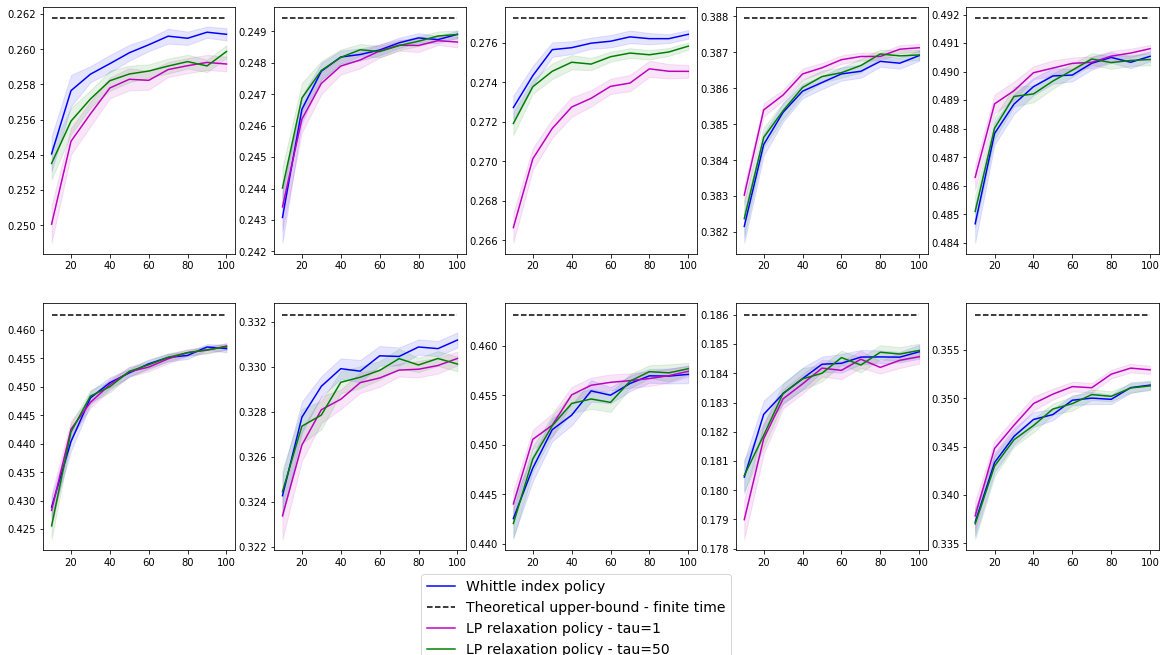

In [13]:
fig, axes = plt.subplots(nrows=2,ncols=5, figsize=(20, 10), facecolor='w', edgecolor='k')

cpt = 0

for i, row in enumerate(axes):
    for j, ax in  enumerate(row):
        pb, alpha = pairs[cpt]
        P0,P1,R1,_ = b[pb]
        cpt += 1

        p = Problem(nb_state, 50, alpha, time_horizon, PR=[P0, P1, R0, R1], tau=1, time_exp=time_exp, repeat_times=repeat_times,
                   number_bandits_list=number_bandits_list)

        # show whittle
        w = p.whittle_simulation()
        ax.plot(p.number_bandits_list, w[0], 'b',label = 'Whittle index policy')
        ax.fill_between(p.number_bandits_list, w[0]-w[1], w[0]+w[1], alpha=0.1, color='b')

        # show upper bound
        total_values_tau1, r_ubound = p.simulation_n_variable()
        ax.plot(l,[r_ubound]*100,'k--',label = 'Theoretical upper-bound - finite time')

        #show tau=1
        ax.plot(p.number_bandits_list, total_values_tau1[0], 'm',label = 'LP relaxation policy - tau=1')
        ax.fill_between(p.number_bandits_list, total_values_tau1[0]-total_values_tau1[1], 
                        total_values_tau1[0]+total_values_tau1[1], alpha=0.1, color='m')

        # show tau=time_horizon
        p.tau = p.time_horizon
        total_values_taumax, r_ubound = p.simulation_n_variable()
        ax.plot(p.number_bandits_list, total_values_taumax[0], 'g',label = 'LP relaxation policy - tau='+str(p.tau))
        ax.fill_between(p.number_bandits_list, total_values_taumax[0]-total_values_taumax[1], 
                        total_values_taumax[0]+total_values_taumax[1], alpha=0.1, color='g')


# legends        
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'lower center', bbox_to_anchor=(0.4,-0.02))